<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9-balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-3-r9.csv?token=AKVFSOBGIFV7NJZFCZXMKYC6ZOH3S')
print(df.shape)
df

(33397, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,138,2,4,4,1,1,5,17,24,8,3,3,3,5,1,0.200000,8,5,1,5,5,25,8,4,4,12,20,85,100,1
1,139,2,4,4,2,2,5,17,24,8,3,3,3,5,1,0.200000,9,4,2,5,8,40,8,8,16,48,20,85,100,1
2,140,2,4,4,3,2,5,17,24,8,3,3,3,5,1,0.200000,10,3,3,5,9,45,8,12,24,72,20,85,100,1
3,141,2,4,4,4,2,5,17,24,8,3,3,3,5,1,0.200000,11,2,4,5,8,40,8,16,32,96,20,85,100,1
4,145,2,4,4,5,3,5,17,24,8,3,3,3,5,1,0.200000,15,1,5,5,5,25,8,20,60,180,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33392,3268003,1,3,5,3,2,3,9,3,3,29,13,20034,5,4,0.800000,34,1,1,1,1,1,3,15,30,601020,15,27,45,1
33393,3268010,1,3,5,4,2,3,9,3,3,29,13,20034,5,4,0.800000,41,1,1,1,1,1,3,20,40,801360,15,27,45,1
33394,3268017,1,3,5,5,3,3,9,3,3,29,13,20034,5,4,0.800000,48,1,1,1,1,1,3,25,75,1502550,15,27,45,1
33395,3268018,1,3,1,1,4,3,10,3,3,29,13,20035,5,4,0.800000,48,1,1,1,1,1,3,1,4,80140,3,30,9,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-1-r9.csv?token=AKVFSODGPMPUAUAOWEQSQRS6ZOH3Y',nrows = 40000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-6-r9.csv?token=AKVFSODCJFFO2ZGZSH27L226ZOH34',nrows = 40000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-9-r9.csv?token=AKVFSOGKBXM6MELNMZJRIAS6ZOH5G',nrows = 40000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-14-r9.csv?token=AKVFSOGDB7YHIEAVN7UNATC6ZOH5G',nrows = 40000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-5-r9.csv?token=AKVFSOHKLKOS52RDA7VMNY26ZOIFQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-12-r9.csv?token=AKVFSOH7MZUVG44ZXSLDTFK6ZOIFU')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOA7CCJCTLRZOPJZR7C6ZOIFY')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(40000, 30)
(40000, 30)
(40000, 30)
(40000, 30)
(41344, 30)
(36404, 30)
(45935, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,9,9,23,7,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9,0
1,84,0,3,4,1,1,5,17,23,7,9,9,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100,0
2,85,0,3,4,2,2,5,17,23,7,9,9,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100,0
3,86,0,3,4,3,2,5,17,23,7,9,9,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100,0
4,87,0,3,4,4,2,5,17,23,7,9,9,3,3,3,1.0,19,2,5,6,10,60,0,16,32,96,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317075,3275759,2,0,4,1,1,5,20,24,8,15,15,20062,4,0,0.0,5,1,1,1,1,1,0,4,4,80248,20,100,100,1
317076,3275760,2,0,4,2,2,5,20,24,8,15,15,20062,4,0,0.0,6,1,1,1,1,1,0,8,16,320992,20,100,100,1
317077,3275761,2,0,4,3,2,5,20,24,8,15,15,20062,4,0,0.0,7,1,1,1,1,1,0,12,24,481488,20,100,100,1
317078,3275762,2,0,4,4,2,5,20,24,8,15,15,20062,4,0,0.0,8,1,1,1,1,1,0,16,32,641984,20,100,100,1


In [0]:
df.shape

(317080, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-2-r9.csv?token=AKVFSOGRZKOSMWOBVNBHDJC6ZOILA',nrows = 30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-5-r9.csv?token=AKVFSOG655OFMIR2S7UXTPK6ZOILG',nrows = 30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-10-r9.csv?token=AKVFSODB7QZJCLIN7TAI2OC6ZOILK',nrows = 30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-12-r9.csv?token=AKVFSODHUDZNIO7KJRHISI26ZOILQ',nrows = 30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-13-r9.csv?token=AKVFSOGKWXNWXTCPU2HVQ6K6ZOILU',nrows = 30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-15-r9.csv?token=AKVFSOA4IMO6422J72M3N226ZOILY',nrows = 30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-10-r9.csv?token=AKVFSOCXONCGY3QGYZZTLOS6ZOJDA',nrows = 30000)

print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,138,2,4,4,1,1,5,17,24,8,3,3,4,5,1,0.20,8,10,1,10,10,100,8,4,4,16,20,85,100,0
1,139,2,4,4,2,2,5,17,24,8,3,3,4,5,1,0.20,9,9,2,10,18,180,8,8,16,64,20,85,100,0
2,140,2,4,4,3,2,5,17,24,8,3,3,4,5,1,0.20,10,8,3,10,24,240,8,12,24,96,20,85,100,0
3,141,2,4,4,4,2,5,17,24,8,3,3,4,5,1,0.20,11,7,4,10,28,280,8,16,32,128,20,85,100,0
4,145,2,4,4,5,3,5,17,24,8,3,3,4,5,1,0.20,15,6,5,10,30,300,8,20,60,240,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2446760,2,4,4,1,1,5,17,24,8,2,2,18992,4,1,0.25,8,1,1,1,1,1,8,4,4,75968,20,85,100,0
29996,2446761,2,4,4,2,2,5,17,24,8,2,2,18992,4,1,0.25,9,1,1,1,1,1,8,8,16,303872,20,85,100,0
29997,2446762,2,4,4,3,2,5,17,24,8,2,2,18992,4,1,0.25,10,1,1,1,1,1,8,12,24,455808,20,85,100,0
29998,2446763,2,4,4,4,2,5,17,24,8,2,2,18992,4,1,0.25,11,1,1,1,1,1,8,16,32,607744,20,85,100,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.340144,0.143020,0.035080,-0.053049,0.107869,0.134654,0.035387,0.130159,-0.284488,-0.523372,-0.128431,-0.075284,-0.029238,-0.064230,-0.043498,-0.033944,0.562074,0.075470,0.059639,0.061391,0.211961,0.118533,0.171591,0.040830
inport,-0.340144,1.000000,-0.225889,0.000035,-0.000036,0.289492,0.186732,0.034119,0.281113,0.338899,0.432338,-0.071018,-0.002690,-0.006573,-0.005692,-0.014951,-0.017714,0.503750,-0.104884,-0.087171,-0.046132,0.039981,0.240199,0.207350,-0.159554
cache_coherence_type,0.143020,-0.225889,1.000000,0.217782,-0.329230,-0.294602,-0.300638,0.041575,-0.169067,-0.079829,-0.040223,-0.102972,0.030273,-0.051428,-0.013000,-0.001081,0.006633,-0.058454,0.474707,0.391016,0.300051,0.627315,-0.298133,0.108746,0.028279
flit_id,0.035080,0.000035,0.217782,1.000000,-0.023888,0.223709,0.199514,0.002241,0.064459,0.021428,-0.020932,0.365334,-0.037722,0.066797,0.017867,0.012670,0.007522,0.044611,0.938161,0.894864,0.640622,0.371212,0.214663,0.323134,-0.000020
flit_type,-0.053049,-0.000036,-0.329230,-0.023888,1.000000,-0.338161,-0.301588,-0.003406,-0.097431,-0.032373,0.031656,0.315188,-0.051071,0.072498,0.013167,0.000690,0.002363,-0.067433,-0.078499,0.191456,0.137189,-0.561151,-0.324486,-0.488463,0.000050
vnet,0.107869,0.289492,-0.294602,0.223709,-0.338161,1.000000,0.979567,-0.039201,0.453458,-0.041860,-0.200087,-0.445898,-0.033819,0.058243,0.015009,0.001080,-0.013832,0.376518,-0.008326,-0.050595,-0.061519,0.559396,0.995308,0.917916,0.001086
vc,0.134654,0.186732,-0.300638,0.199514,-0.301588,0.979567,1.000000,-0.043865,0.403879,-0.130514,-0.295398,-0.454320,-0.028955,0.080507,0.031679,0.018089,0.001496,0.309329,-0.029234,-0.061817,-0.072523,0.537509,0.993888,0.894155,0.010387
traversal_id,0.035387,0.034119,0.041575,0.002241,-0.003406,-0.039201,-0.043865,1.000000,0.039419,0.046037,0.006326,0.047074,-0.193263,-0.193228,-0.237502,-0.181371,-0.142186,0.058527,0.019058,0.015915,0.546896,0.004116,-0.041106,-0.023517,0.000100
hop_count,0.130159,0.281113,-0.169067,0.064459,-0.097431,0.453458,0.403879,0.039419,1.000000,0.520862,0.017543,-0.035923,-0.091502,-0.062198,-0.094450,-0.084563,-0.074244,0.407594,-0.073176,-0.062627,-0.028431,0.222890,0.431987,0.401506,0.017541
current_hop,-0.284488,0.338899,-0.079829,0.021428,-0.032373,-0.041860,-0.130514,0.046037,0.520862,1.000000,0.768249,0.435116,-0.030123,-0.138194,-0.103433,-0.092106,-0.074716,0.058201,-0.011106,-0.018052,0.011846,-0.103356,-0.084118,-0.076689,0.071715


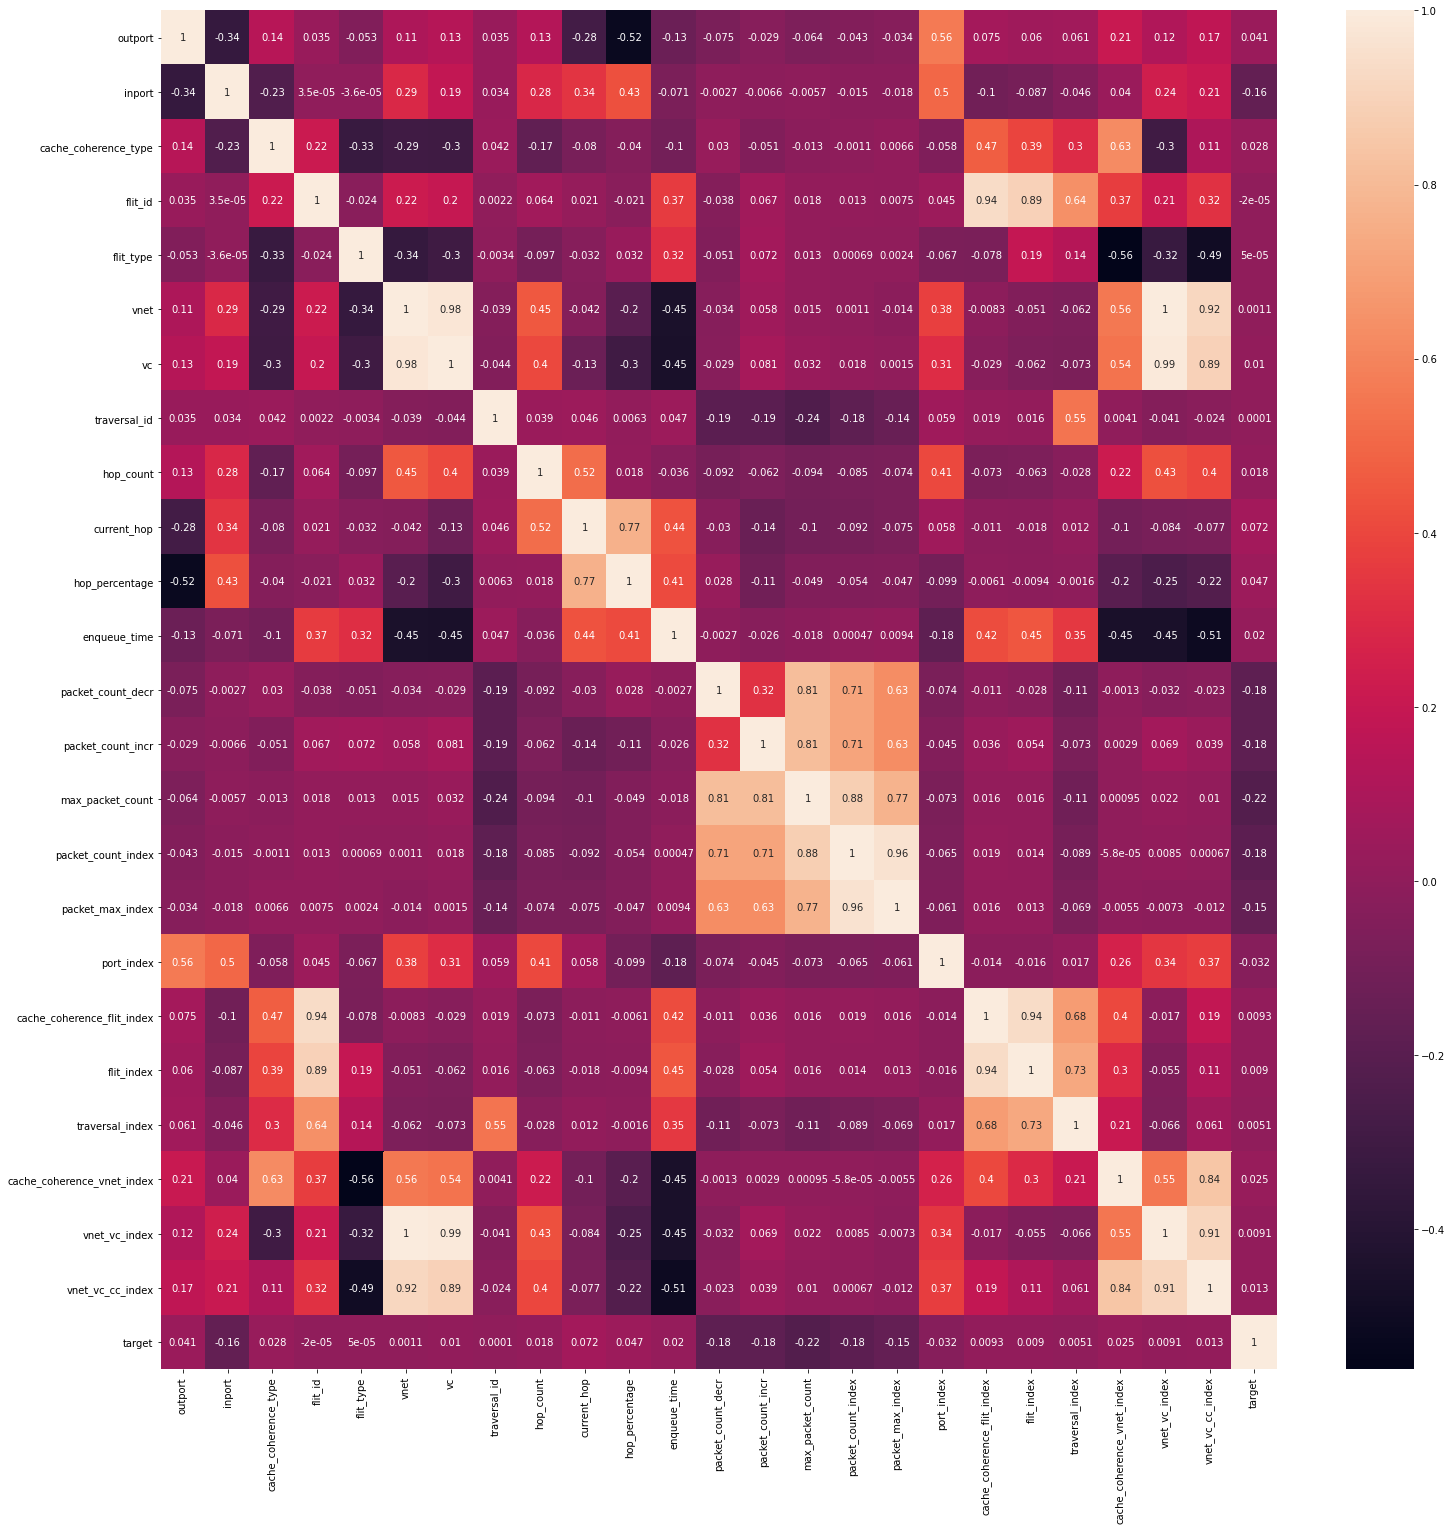

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9
1,0,3,4,1,1,5,17,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100
2,0,3,4,2,2,5,17,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100
3,0,3,4,3,2,5,17,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100
4,0,3,4,4,2,5,17,3,3,3,1.0,19,2,5,6,10,60,0,16,32,96,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317075,2,0,4,1,1,5,20,20062,4,0,0.0,5,1,1,1,1,1,0,4,4,80248,20,100,100
317076,2,0,4,2,2,5,20,20062,4,0,0.0,6,1,1,1,1,1,0,8,16,320992,20,100,100
317077,2,0,4,3,2,5,20,20062,4,0,0.0,7,1,1,1,1,1,0,12,24,481488,20,100,100
317078,2,0,4,4,2,5,20,20062,4,0,0.0,8,1,1,1,1,1,0,16,32,641984,20,100,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.0,0.00,1.000000,0.0,0.000000,0.00000,0.500000,0.00,0.0,0.000000,0.15625,0.00000,0.15625,0.017361,0.003670,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.75,0.5,0.00,0.000000,1.0,0.727273,0.00000,0.500000,0.75,1.0,0.179104,0.12500,0.03125,0.15625,0.031250,0.006187,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,0.0,0.75,0.5,0.25,0.333333,1.0,0.727273,0.00000,0.500000,0.75,1.0,0.194030,0.09375,0.06250,0.15625,0.038194,0.007445,0.0,0.241379,0.139535,0.000016,0.944444,0.794521,1.0
3,0.0,0.75,0.5,0.50,0.333333,1.0,0.727273,0.00000,0.500000,0.75,1.0,0.208955,0.06250,0.09375,0.15625,0.038194,0.007445,0.0,0.379310,0.232558,0.000027,0.944444,0.794521,1.0
4,0.0,0.75,0.5,0.75,0.333333,1.0,0.727273,0.00000,0.500000,0.75,1.0,0.223881,0.03125,0.12500,0.15625,0.031250,0.006187,0.0,0.517241,0.325581,0.000038,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317075,0.5,0.00,0.5,0.00,0.000000,1.0,1.000000,0.82344,0.666667,0.00,0.0,0.014925,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.103448,0.000000,0.036595,0.944444,1.000000,1.0
317076,0.5,0.00,0.5,0.25,0.333333,1.0,1.000000,0.82344,0.666667,0.00,0.0,0.029851,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.241379,0.139535,0.146395,0.944444,1.000000,1.0
317077,0.5,0.00,0.5,0.50,0.333333,1.0,1.000000,0.82344,0.666667,0.00,0.0,0.044776,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.379310,0.232558,0.219595,0.944444,1.000000,1.0
317078,0.5,0.00,0.5,0.75,0.333333,1.0,1.000000,0.82344,0.666667,0.00,0.0,0.059701,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.517241,0.325581,0.292795,0.944444,1.000000,1.0


In [0]:
train_X[train_X.duplicated()].shape

(6557, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.00,0.25,0.20,0.065574,0.290323,0.000000,0.290323,0.033210,0.011375,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.20,0.081967,0.258065,0.032258,0.290323,0.062731,0.020568,1.0,0.241379,0.139535,0.000028,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.20,0.098361,0.225806,0.064516,0.290323,0.084871,0.027462,1.0,0.379310,0.232558,0.000047,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.20,0.114754,0.193548,0.096774,0.290323,0.099631,0.032058,1.0,0.517241,0.325581,0.000066,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.00,0.25,0.20,0.180328,0.161290,0.129032,0.290323,0.107011,0.034356,1.0,0.655172,0.651163,0.000131,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.999947,0.75,0.25,0.25,0.065574,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.103448,0.000000,0.044438,0.944444,0.920635,1.000000
29996,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.999947,0.75,0.25,0.25,0.081967,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.241379,0.139535,0.177779,0.944444,0.920635,1.000000
29997,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.999947,0.75,0.25,0.25,0.098361,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266674,0.944444,0.920635,1.000000
29998,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.999947,0.75,0.25,0.25,0.114754,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.517241,0.325581,0.355568,0.944444,0.920635,1.000000


In [0]:
test_X[test_X.duplicated()].shape

(47, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.2,0.064516,0.321429,0.000000,0.321429,0.040179,0.015175,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.080645,0.285714,0.035714,0.321429,0.075893,0.027437,0.666667,0.241379,0.139535,0.000032,0.944444,0.920635,1.000000
2,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.096774,0.250000,0.071429,0.321429,0.102679,0.036634,0.666667,0.379310,0.232558,0.000053,0.944444,0.920635,1.000000
3,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.112903,0.214286,0.107143,0.321429,0.120536,0.042765,0.666667,0.517241,0.325581,0.000074,0.944444,0.920635,1.000000
4,0.5,1.0,0.5,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.2,0.177419,0.178571,0.142857,0.321429,0.129464,0.045831,0.666667,0.655172,0.651163,0.000148,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.999881,1.0,0.25,0.2,0.112903,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356055,0.944444,0.920635,1.000000
29996,0.5,1.0,0.5,1.00,0.666667,1.0,0.888889,0.999881,1.0,0.25,0.2,0.177419,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.655172,0.651163,0.667613,0.944444,0.920635,1.000000
29997,0.5,1.0,1.0,0.00,1.000000,0.0,0.000000,0.999941,1.0,0.25,0.2,0.080645,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.206897,0.279070,0.311566,1.000000,0.000000,0.593407
29998,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.000000,1.0,0.25,0.2,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044503,0.944444,0.920635,1.000000


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000063,0.25,0.25,0.5,0.062500,0.322581,0.000000,0.322581,0.036900,0.013788,1.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.00,0.25,0.2,0.062500,0.290323,0.032258,0.322581,0.070111,0.025164,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.078125,0.258065,0.064516,0.322581,0.095941,0.034011,1.0,0.241379,0.139535,0.000033,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.093750,0.225806,0.096774,0.322581,0.114391,0.040331,1.0,0.379310,0.232558,0.000056,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.109375,0.193548,0.129032,0.322581,0.125461,0.044123,1.0,0.517241,0.325581,0.000078,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.833333,0.00,0.000000,0.0,0.333333,0.999937,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.066656,0.833333,0.142857,0.494505
29996,1.0,0.0,0.833333,0.25,0.333333,0.0,0.333333,0.999937,0.00,0.00,0.0,0.109375,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266658,0.833333,0.142857,0.494505
29997,1.0,0.0,0.833333,0.50,0.333333,0.0,0.333333,0.999937,0.00,0.00,0.0,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.399993,0.833333,0.142857,0.494505
29998,1.0,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999937,0.00,0.00,0.0,0.328125,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533328,0.833333,0.142857,0.494505


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(11, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.2,0.066667,0.148148,0.000000,0.148148,0.019139,0.004082,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.083333,0.111111,0.037037,0.148148,0.033493,0.006634,1.0,0.241379,0.139535,0.000030,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.100000,0.074074,0.074074,0.148148,0.038278,0.007484,1.0,0.379310,0.232558,0.000050,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.116667,0.037037,0.111111,0.148148,0.033493,0.006634,1.0,0.517241,0.325581,0.000070,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.2,0.183333,0.000000,0.148148,0.148148,0.019139,0.004082,1.0,0.655172,0.651163,0.000140,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.833333,0.25,0.333333,0.0,0.333333,0.999944,0.0,0.00,0.0,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266659,0.833333,0.142857,0.494505
29996,1.0,0.0,0.833333,0.50,0.333333,0.0,0.333333,0.999944,0.0,0.00,0.0,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.399994,0.833333,0.142857,0.494505
29997,1.0,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999944,0.0,0.00,0.0,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533329,0.833333,0.142857,0.494505
29998,1.0,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999944,0.0,0.00,0.0,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.142857,0.494505


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.75,0.750000,0.196721,0.117647,0.000000,0.117647,0.012384,0.002117,0.375,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.25,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.75,0.750000,0.213115,0.088235,0.029412,0.117647,0.021672,0.003439,0.375,0.241379,0.139535,0.000033,0.944444,0.920635,1.000000
2,0.25,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.75,0.750000,0.229508,0.058824,0.058824,0.117647,0.024768,0.003880,0.375,0.379310,0.232558,0.000054,0.944444,0.920635,1.000000
3,0.25,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.75,0.750000,0.245902,0.029412,0.088235,0.117647,0.021672,0.003439,0.375,0.517241,0.325581,0.000076,0.944444,0.920635,1.000000
4,0.25,0.75,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.75,0.750000,0.311475,0.000000,0.117647,0.117647,0.012384,0.002117,0.375,0.655172,0.651163,0.000153,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.25,0.50,0.333333,0.00,1.000000,0.0,0.111111,0.999755,0.50,0.50,0.666667,0.131148,0.176471,0.117647,0.294118,0.105263,0.033865,0.250,0.068966,0.093023,0.133313,0.333333,0.047619,0.197802
29996,1.00,0.50,0.833333,1.00,0.666667,0.0,0.000000,0.999837,0.25,0.25,0.500000,0.540984,0.147059,0.147059,0.294118,0.108359,0.034836,1.000,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29997,1.00,0.50,0.166667,0.00,1.000000,0.0,0.222222,0.999918,0.25,0.25,0.500000,0.540984,0.117647,0.176471,0.294118,0.105263,0.033865,1.000,0.034483,0.046512,0.088886,0.166667,0.095238,0.098901
29998,0.25,0.50,1.000000,0.00,1.000000,0.0,0.333333,0.999837,0.25,0.25,0.500000,0.114754,0.088235,0.205882,0.294118,0.095975,0.030955,0.250,0.206897,0.279070,0.311104,1.000000,0.142857,0.593407


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.00,0.25,0.2,0.062500,0.290323,0.000000,0.290323,0.033210,0.011375,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.078125,0.258065,0.032258,0.290323,0.062731,0.020568,1.0,0.241379,0.139535,0.000030,0.944444,0.920635,1.000000
2,0.5,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.093750,0.225806,0.064516,0.290323,0.084871,0.027462,1.0,0.379310,0.232558,0.000050,0.944444,0.920635,1.000000
3,0.5,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.2,0.109375,0.193548,0.096774,0.290323,0.099631,0.032058,1.0,0.517241,0.325581,0.000070,0.944444,0.920635,1.000000
4,0.5,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.00,0.25,0.2,0.171875,0.161290,0.129032,0.290323,0.107011,0.034356,1.0,0.655172,0.651163,0.000139,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.25,0.000000,0.00,1.000000,0.0,0.111111,1.000000,0.75,1.00,1.0,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.044507,0.000000,0.047619,0.000000
29996,1.0,0.00,0.833333,0.00,0.000000,0.0,0.222222,0.999944,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.066762,0.833333,0.095238,0.494505
29997,1.0,0.00,0.833333,0.25,0.333333,0.0,0.222222,0.999944,0.00,0.00,0.0,0.109375,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.267077,0.833333,0.095238,0.494505
29998,1.0,0.00,0.833333,0.50,0.333333,0.0,0.222222,0.999944,0.00,0.00,0.0,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.400620,0.833333,0.095238,0.494505


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(66, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.50,0.000000,0.00,1.000000,0.0,0.0,0.0,0.25,0.333333,0.5,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.5,1.00,0.500000,0.00,0.000000,1.0,1.0,0.0,0.25,0.333333,0.5,0.063492,0.153846,0.000000,0.153846,0.020513,0.004536,1.0,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
2,0.5,1.00,0.500000,0.25,0.333333,1.0,1.0,0.0,0.25,0.333333,0.5,0.079365,0.115385,0.038462,0.153846,0.035897,0.007371,1.0,0.241379,0.139535,0.000029,0.944444,1.0,1.000000
3,0.5,1.00,0.500000,0.50,0.333333,1.0,1.0,0.0,0.25,0.333333,0.5,0.095238,0.076923,0.076923,0.153846,0.041026,0.008316,1.0,0.379310,0.232558,0.000049,0.944444,1.0,1.000000
4,0.5,1.00,0.500000,0.75,0.333333,1.0,1.0,0.0,0.25,0.333333,0.5,0.111111,0.038462,0.115385,0.153846,0.035897,0.007371,1.0,0.517241,0.325581,0.000068,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.75,0.666667,0.00,0.000000,0.0,0.0,1.0,0.50,1.000000,1.0,0.190476,0.076923,0.000000,0.076923,0.010256,0.001512,0.0,0.137931,0.011628,0.055571,0.666667,0.0,0.395604
29996,0.0,0.75,0.666667,0.25,0.333333,0.0,0.0,1.0,0.50,1.000000,1.0,0.301587,0.038462,0.038462,0.076923,0.015385,0.002079,0.0,0.310345,0.186047,0.222312,0.666667,0.0,0.395604
29997,0.0,0.75,0.666667,0.50,0.333333,0.0,0.0,1.0,0.50,1.000000,1.0,0.412698,0.000000,0.076923,0.076923,0.010256,0.001512,0.0,0.482759,0.302326,0.333474,0.666667,0.0,0.395604
29998,0.0,0.75,0.666667,0.75,0.333333,0.0,0.0,1.0,0.50,1.000000,1.0,0.523810,0.615385,0.000000,0.615385,0.082051,0.054432,0.0,0.655172,0.418605,0.444635,0.666667,0.0,0.395604


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    160000
1    157080
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  3798.333138
13           packet_count_incr  1912.530425
12           packet_count_decr  1885.866285
15          packet_count_index  1574.915795
1                       inport  1284.478214
16            packet_max_index   975.180970
9                  current_hop   238.283165
10              hop_percentage   118.796414
0                      outport    90.852798
17                  port_index    75.850990
2         cache_coherence_type    18.230890
21  cache_coherence_vnet_index    14.429675
11                enqueue_time    13.556514
6                           vc     9.095415
8                    hop_count     8.530481
22               vnet_vc_index     8.223298
23            vnet_vc_cc_index     6.457370


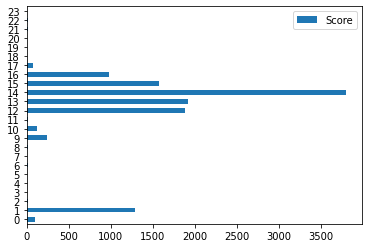

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 65.65811467137631
Test Prediction  65.42039863756781


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  27.996666666666663


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  37.596666666666664


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  25.629999999999995


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  24.32


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  18.86


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  21.906666666666666


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  86.34666666666668


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
22,vnet_vc_index,60.861169
2,cache_coherence_type,7.217327
18,cache_coherence_flit_index,3.414631
17,port_index,2.824928
16,packet_max_index,2.551913
9,current_hop,1.394983
10,hop_percentage,0.842514
4,flit_type,0.730617
15,packet_count_index,0.286932
20,traversal_index,-0.180630


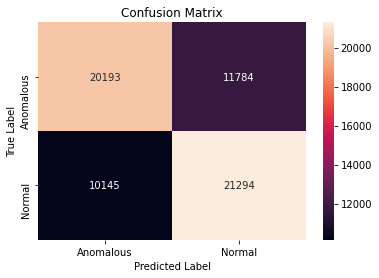

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65     31977
           1       0.64      0.68      0.66     31439

    accuracy                           0.65     63416
   macro avg       0.65      0.65      0.65     63416
weighted avg       0.65      0.65      0.65     63416



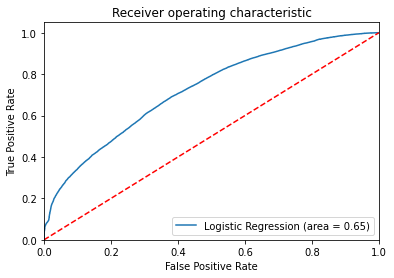

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

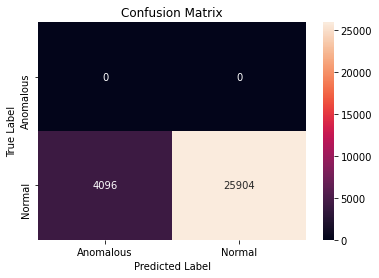

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93     30000

    accuracy                           0.86     30000
   macro avg       0.50      0.43      0.46     30000
weighted avg       1.00      0.86      0.93     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.8203607922291
Test Prediction  79.3254068373912


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  67.04


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  47.32


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  54.690000000000005


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  53.42


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.14


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  59.13


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  56.346666666666664


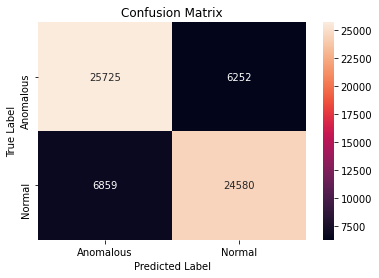

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     31977
           1       0.80      0.78      0.79     31439

    accuracy                           0.79     63416
   macro avg       0.79      0.79      0.79     63416
weighted avg       0.79      0.79      0.79     63416



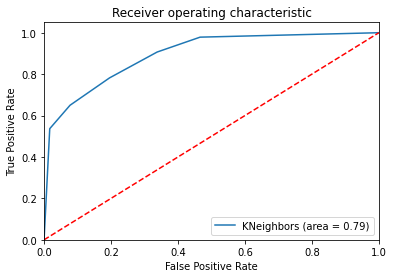

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

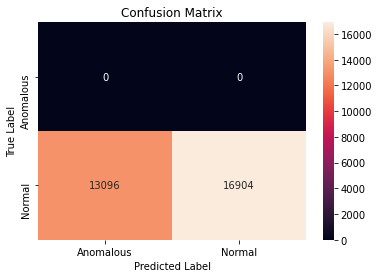

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.56      0.72     30000

    accuracy                           0.56     30000
   macro avg       0.50      0.28      0.36     30000
weighted avg       1.00      0.56      0.72     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 57.4208401665195
Test Prediction Score 57.45553172700896


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 15.853333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  23.636666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  28.4


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  19.783333333333335


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  27.65666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  19.009999999999998


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  87.41666666666667


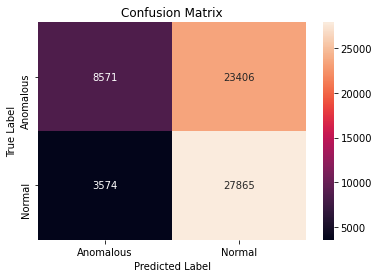

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.27      0.39     31977
           1       0.54      0.89      0.67     31439

    accuracy                           0.57     63416
   macro avg       0.62      0.58      0.53     63416
weighted avg       0.63      0.57      0.53     63416



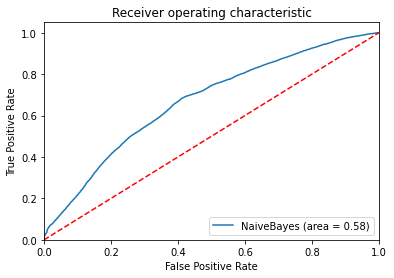

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 202931 samples, validate on 50733 samples
Epoch 1/10
202931/202931 [==============================] - 7s 35us/step - loss: 0.2219 - accuracy: 0.6400 - val_loss: 0.2041 - val_accuracy: 0.6731
Epoch 2/10
202931/202931 [==============================] - 7s 34us/step - loss: 0.2006 - accuracy: 0.6818 - val_loss: 0.1978 - val_accuracy: 0.6922
Epoch 3/10
202931/202931 [==============================] - 7s 34us/step - loss: 0.1974 - accuracy: 0.6882 - val_loss: 0.1961 - val_accuracy: 0.6913
Epoch 4/10
202931/202931 [==============================] - 7s 35us/step - loss: 0.1961 - accuracy: 0.6887 - val_loss: 0.1951 - val_accuracy: 0.6927
Epoch 5/10
202931/202931 [==============================] - 7s 35us/step - loss: 0.1954 - accuracy: 0.6874 - val_loss: 0.1942 - val_accuracy: 0.6920
Epoch 6/10
202931/202931 [==============================] - 7s 34us/step - loss: 0.1947 - accuracy: 0.6883 - val_loss: 0.1937 - val_accuracy: 0.6918
Epoch 7/10
202931/202931 [=============================

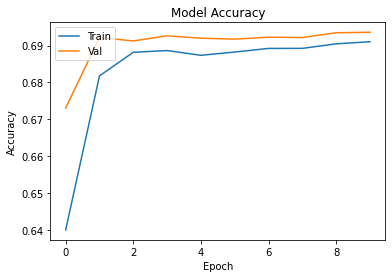

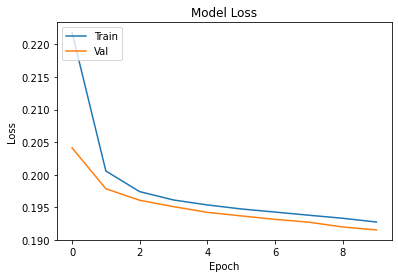

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.18%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.65%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 42.31%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.64%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.68%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.68%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.04%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.52%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 202931 samples, validate on 50733 samples
Epoch 1/30
202931/202931 [==============================] - 7s 33us/step - loss: 0.2496 - accuracy: 0.5127 - val_loss: 0.2478 - val_accuracy: 0.5354
Epoch 2/30
202931/202931 [==============================] - 7s 34us/step - loss: 0.2452 - accuracy: 0.5665 - val_loss: 0.2410 - val_accuracy: 0.5988
Epoch 3/30
202931/202931 [==============================] - 7s 35us/step - loss: 0.2375 - accuracy: 0.6003 - val_loss: 0.2357 - val_accuracy: 0.6007
Epoch 4/30
202931/202931 [==============================] - 7s 33us/step - loss: 0.2346 - accuracy: 0.6057 - val_loss: 0.2335 - val_accuracy: 0.6068
Epoch 5/30
202931/202931 [==============================] - 7s 33us/step - loss: 0.2320 - accuracy: 0.6110 - val_loss: 0.2306 - val_accuracy: 0.6092
Epoch 6/30
202931/202931 [==============================] - 7s 34us/step - loss: 0.2290 - accuracy: 0.6139 - val_loss: 0.2272 - val_accuracy: 0.6136
Epoch 7/30
202931/202931 [=============================

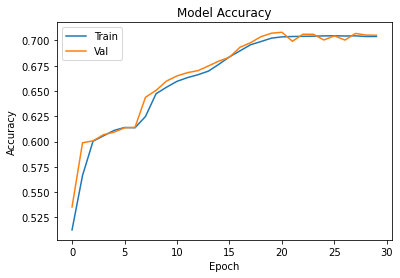

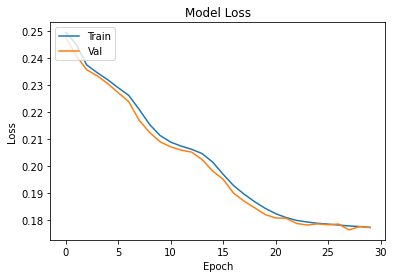

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 28.80%
accuracy: 27.11%
accuracy: 21.31%
accuracy: 15.11%
accuracy: 48.39%
accuracy: 27.05%
accuracy: 90.32%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 202931 samples, validate on 50733 samples
Epoch 1/30
202931/202931 [==============================] - 7s 35us/step - loss: 0.2473 - accuracy: 0.5320 - val_loss: 0.2428 - val_accuracy: 0.5509
Epoch 2/30
202931/202931 [==============================] - 7s 35us/step - loss: 0.2355 - accuracy: 0.5835 - val_loss: 0.2295 - val_accuracy: 0.6042
Epoch 3/30
202931/202931 [==============================] - 7s 35us/step - loss: 0.2264 - accuracy: 0.6169 - val_loss: 0.2245 - val_accuracy: 0.6241
Epoch 4/30
202931/202931 [==============================] - 7s 35us/step - loss: 0.2239 - accuracy: 0.6236 - val_loss: 0.2234 - val_accuracy: 0.6251
Epoch 5/30
202931/202931 [==============================] - 8s 37us/step - loss: 0.2231 - accuracy: 0.6245 - val_loss: 0.2230 - val_accuracy: 0.6268
Epoch 6/30
202931/202931 [==============================] - 9s 44us/step - loss: 0.2225 - accuracy: 0.6254 - val_loss: 0.2223 - val_accuracy: 0.6272
Epoch 7/30
202931/202931 [=============================

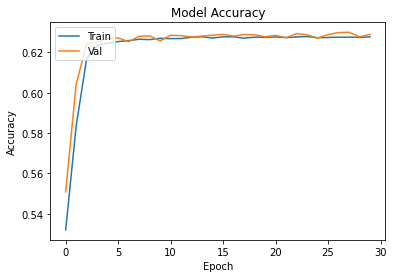

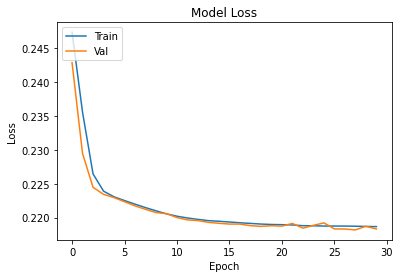

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 16.76%
accuracy: 18.78%
accuracy: 20.91%
accuracy: 9.76%
accuracy: 50.98%
accuracy: 15.53%
accuracy: 77.15%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 202931 samples, validate on 50733 samples
Epoch 1/100
202931/202931 [==============================] - 13s 66us/step - loss: 0.1663 - accuracy: 0.7217 - val_loss: 0.1522 - val_accuracy: 0.7507
Epoch 2/100
202931/202931 [==============================] - 13s 64us/step - loss: 0.1520 - accuracy: 0.7451 - val_loss: 0.1420 - val_accuracy: 0.7636
Epoch 3/100
202931/202931 [==============================] - 14s 68us/step - loss: 0.1486 - accuracy: 0.7485 - val_loss: 0.1418 - val_accuracy: 0.7626
Epoch 4/100
202931/202931 [==============================] - 14s 71us/step - loss: 0.1470 - accuracy: 0.7533 - val_loss: 0.1404 - val_accuracy: 0.7632
Epoch 5/100
202931/202931 [==============================] - 14s 67us/step - loss: 0.1461 - accuracy: 0.7543 - val_loss: 0.1409 - val_accuracy: 0.7597
Epoch 6/100
202931/202931 [==============================] - 13s 65us/step - loss: 0.1448 - accuracy: 0.7561 - val_loss: 0.1410 - val_accuracy: 0.7525
Epoch 7/100
202931/202931 [================

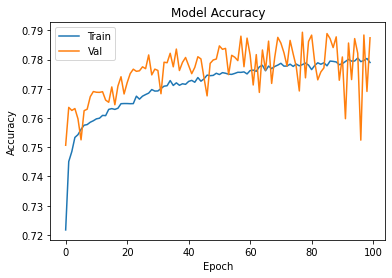

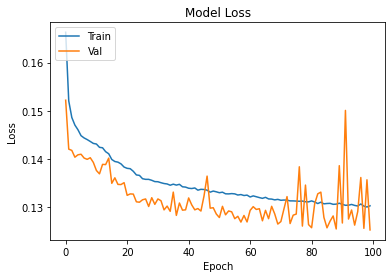

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.54%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.00%
accuracy: 54.36%
accuracy: 70.50%
accuracy: 56.44%
accuracy: 90.10%
accuracy: 64.60%
accuracy: 51.82%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 202931 samples, validate on 50733 samples
Epoch 1/50
202931/202931 [==============================] - 14s 70us/step - loss: 0.1695 - accuracy: 0.7217 - val_loss: 0.1503 - val_accuracy: 0.7517
Epoch 2/50
202931/202931 [==============================] - 14s 67us/step - loss: 0.1538 - accuracy: 0.7407 - val_loss: 0.1436 - val_accuracy: 0.7598
Epoch 3/50
202931/202931 [==============================] - 14s 70us/step - loss: 0.1506 - accuracy: 0.7464 - val_loss: 0.1416 - val_accuracy: 0.7685
Epoch 4/50
202931/202931 [==============================] - 14s 70us/step - loss: 0.1491 - accuracy: 0.7477 - val_loss: 0.1403 - val_accuracy: 0.7635
Epoch 5/50
202931/202931 [==============================] - 14s 68us/step - loss: 0.1473 - accuracy: 0.7519 - val_loss: 0.1416 - val_accuracy: 0.7658
Epoch 6/50
202931/202931 [==============================] - 14s 68us/step - loss: 0.1467 - accuracy: 0.7539 - val_loss: 0.1410 - val_accuracy: 0.7615
Epoch 7/50
202931/202931 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.02%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.19%
accuracy: 45.52%
accuracy: 57.24%
accuracy: 50.45%
accuracy: 86.78%
accuracy: 58.91%
accuracy: 52.85%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 90.29661284218494
Test Prediction Score 86.9906648164501


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 68.31333333333333
Test Prediction Score 53.14333333333333
Test Prediction Score 66.53999999999999
Test Prediction Score 56.776666666666664
Test Prediction Score 77.27666666666667
Test Prediction Score 62.71666666666667
Test Prediction Score 50.60666666666667


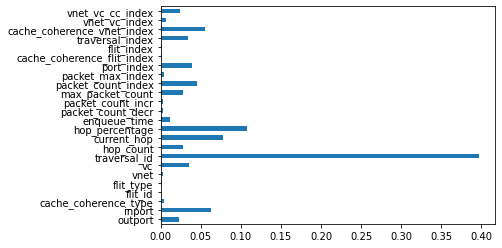

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

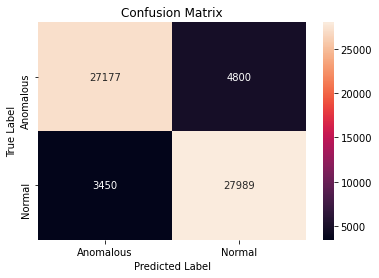

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     31977
           1       0.85      0.89      0.87     31439

    accuracy                           0.87     63416
   macro avg       0.87      0.87      0.87     63416
weighted avg       0.87      0.87      0.87     63416



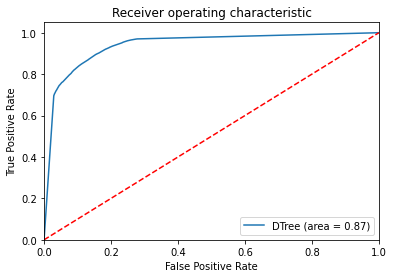

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 93.97707203229469
Test Prediction Score 89.07688911315756


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 66.37333333333333
Test Prediction Score 52.44
Test Prediction Score 75.22999999999999
Test Prediction Score 55.059999999999995
Test Prediction Score 82.60666666666665
Test Prediction Score 60.86
Test Prediction Score 38.263333333333335


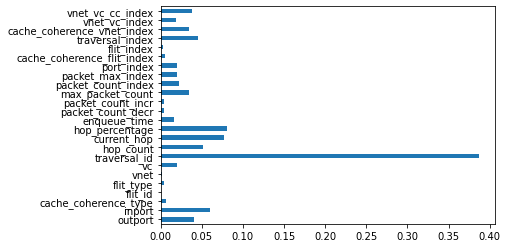

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

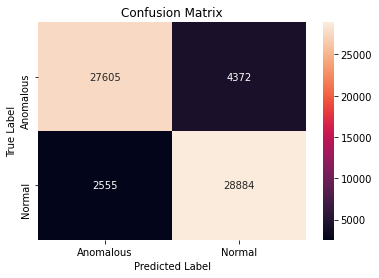

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     31977
           1       0.87      0.92      0.89     31439

    accuracy                           0.89     63416
   macro avg       0.89      0.89      0.89     63416
weighted avg       0.89      0.89      0.89     63416



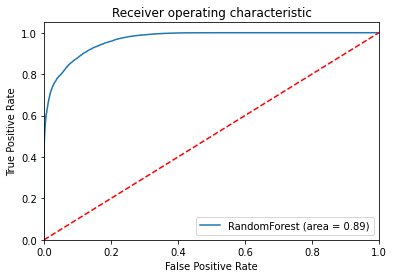

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.00222341364955
Test Prediction Score 93.74290399899078


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 62.60333333333333
Test Prediction Score 52.00333333333334
Test Prediction Score 70.39
Test Prediction Score 52.09
Test Prediction Score 75.11
Test Prediction Score 57.57666666666667
Test Prediction Score 38.519999999999996


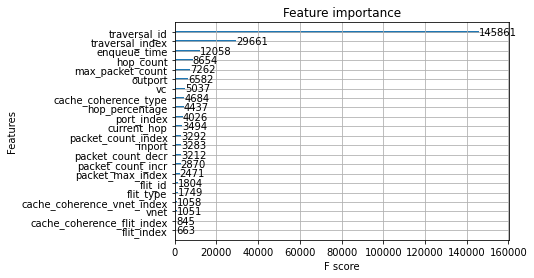

In [0]:
plot_importance(xgbc)
plt.show()

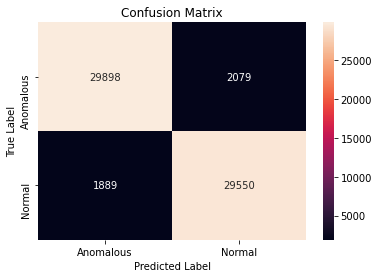

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     31977
           1       0.93      0.94      0.94     31439

    accuracy                           0.94     63416
   macro avg       0.94      0.94      0.94     63416
weighted avg       0.94      0.94      0.94     63416



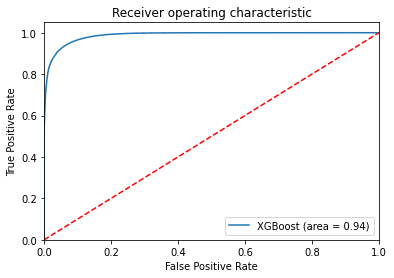

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.04202409486565
Test Prediction Score 83.95830705184811


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 59.3
Test Prediction Score 49.91
Test Prediction Score 61.970000000000006
Test Prediction Score 47.32
Test Prediction Score 76.18333333333334
Test Prediction Score 55.14
Test Prediction Score 48.89


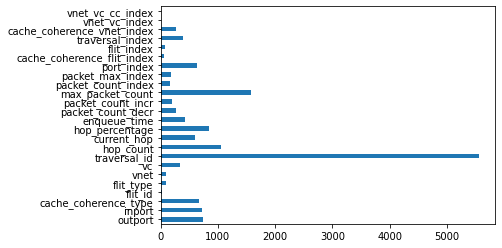

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

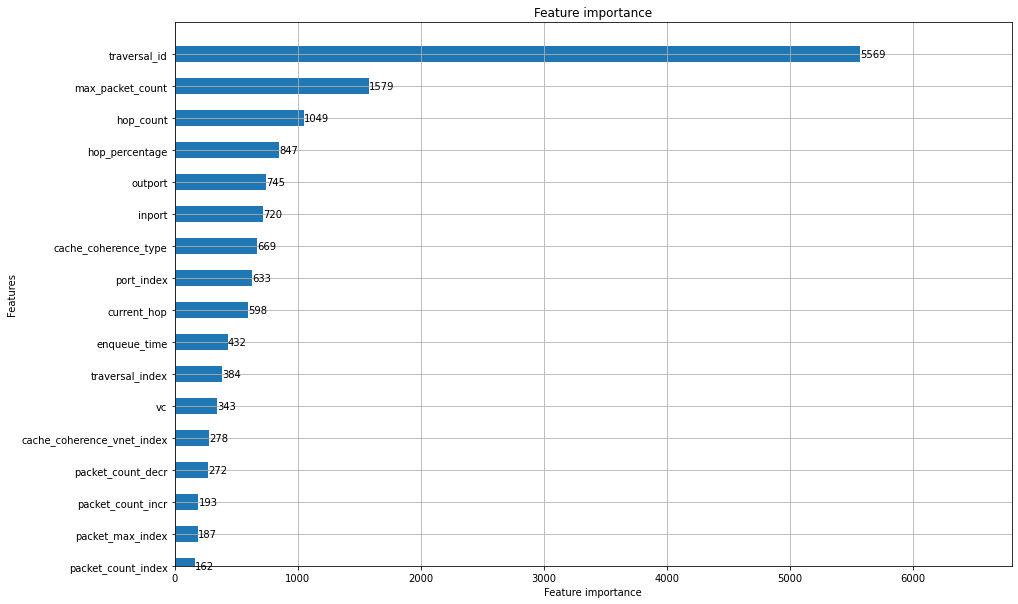

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[5569,
 1579,
 1049,
 847,
 745,
 720,
 669,
 633,
 598,
 432,
 384,
 343,
 278,
 272,
 193,
 187,
 162,
 88,
 88,
 79,
 52,
 32,
 1,
 0]

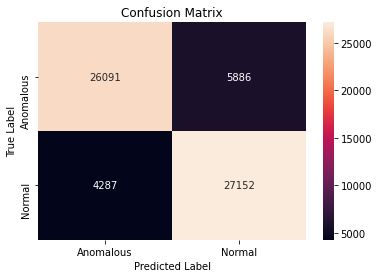

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     31977
           1       0.82      0.86      0.84     31439

    accuracy                           0.84     63416
   macro avg       0.84      0.84      0.84     63416
weighted avg       0.84      0.84      0.84     63416



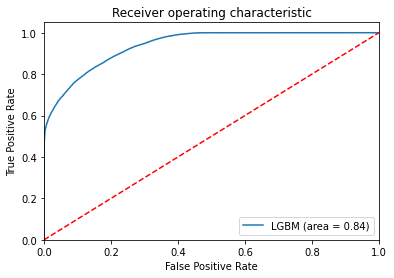

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()